# 빅데이터 분석 (7-8주차) 10월26일 10월28일
> Pytorch CNN (MNIST 3/7), CAM

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Big Data Analysis, Pytorch CNN (MNIST 3 7), CAM]

### import 

In [1]:
import torch 
from fastai.vision.all import * 

In [2]:
import graphviz

In [3]:
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

### data 

`-` download data 

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
path.ls()

(#3) [Path('/home/csy/.fastai/data/mnist_sample/train'),Path('/home/csy/.fastai/data/mnist_sample/labels.csv'),Path('/home/csy/.fastai/data/mnist_sample/valid')]

`-` list 

In [6]:
threes=(path/'train'/'3').ls()
sevens=(path/'train'/'7').ls()

`-` list $\to$ image 

In [7]:
Image.open(threes[4])

`-` image $\to$ tensor 

In [8]:
tensor(Image.open(threes[4]))

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 128, 128,
         191, 128,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0, 128, 255, 255, 255, 255,
         255, 255, 191,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

- 여기에서 tensor는 파이토치가 아니라 fastai에서 구현한 함수임 

`-` 여러개의 리스트를 모두 텐서로 바꿔보자. 

In [9]:
seven_tensor = torch.stack([tensor(Image.open(i)) for i in sevens]).float()/255
three_tensor = torch.stack([tensor(Image.open(i)) for i in threes]).float()/255

`-` $X$와 $y$를 만들자. 

In [10]:
seven_tensor.shape, three_tensor.shape

(torch.Size([6265, 28, 28]), torch.Size([6131, 28, 28]))

In [11]:
y=torch.tensor([0.0]*6265+ [1.0]*6131).reshape(12396,1)

In [12]:
X=torch.vstack([seven_tensor,three_tensor]).reshape(12396,-1)

In [13]:
X.shape, y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [14]:
X=X.reshape(12396,1,28,28)

In [15]:
X.shape

torch.Size([12396, 1, 28, 28])

### 1. 지난시간까지의 모형 (직접 네트워크 설계, pytorch)

#### 2d convolution with windowsize=5

In [16]:
c1=torch.nn.Conv2d(1,16,5) # 입력채널=1 (흑백이므로), 출력채널=16, 윈도우크기5 

In [17]:
X.shape, c1(X).shape

(torch.Size([12396, 1, 28, 28]), torch.Size([12396, 16, 24, 24]))

#### MaxPool2d

In [18]:
m1=torch.nn.MaxPool2d(2)

In [19]:
X.shape,c1(X).shape,m1(c1(X)).shape

(torch.Size([12396, 1, 28, 28]),
 torch.Size([12396, 16, 24, 24]),
 torch.Size([12396, 16, 12, 12]))

#### ReLU 

In [20]:
a1=torch.nn.ReLU()

In [21]:
X.shape,c1(X).shape, m1(c1(X)).shape, a1(m1(c1(X))).shape

(torch.Size([12396, 1, 28, 28]),
 torch.Size([12396, 16, 24, 24]),
 torch.Size([12396, 16, 12, 12]),
 torch.Size([12396, 16, 12, 12]))

#### flatten 

In [22]:
class Flatten(torch.nn.Module):
    def forward(self,x): 
        return x.reshape(12396,-1)

In [23]:
flatten=Flatten()

In [24]:
X.shape,c1(X).shape, m1(c1(X)).shape, a1(m1(c1(X))).shape, flatten(a1(m1(c1(X)))).shape

(torch.Size([12396, 1, 28, 28]),
 torch.Size([12396, 16, 24, 24]),
 torch.Size([12396, 16, 12, 12]),
 torch.Size([12396, 16, 12, 12]),
 torch.Size([12396, 2304]))

#### linear 

In [25]:
l1=torch.nn.Linear(in_features=2304,out_features=1) 

In [26]:
X.shape,\
c1(X).shape, \
m1(c1(X)).shape, \
a1(m1(c1(X))).shape, \
flatten(a1(m1(c1(X)))).shape, \
l1(flatten(a1(m1(c1(X))))).shape

(torch.Size([12396, 1, 28, 28]),
 torch.Size([12396, 16, 24, 24]),
 torch.Size([12396, 16, 12, 12]),
 torch.Size([12396, 16, 12, 12]),
 torch.Size([12396, 2304]),
 torch.Size([12396, 1]))

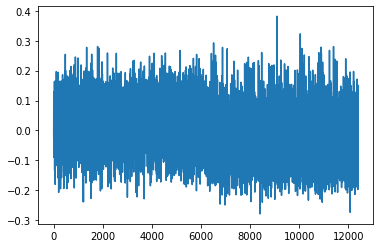

In [27]:
plt.plot(l1(flatten(a1(m1(c1(X))))).data)

#### networks 설계 

In [28]:
net = nn.Sequential(c1,m1,a1,flatten,l1)
## 마지막의 sigmoid는 생략한다. torch.nn..BCEWithLogitsLoss()에 내장되어 있을것이므로 

`-` 손실함수와 옵티마이저 정의 

In [29]:
loss_fn=torch.nn.BCEWithLogitsLoss()
optimizer= torch.optim.Adam(net.parameters())

`-` step1~4 (CPU로 돌아가는 거기 때문에 시간 필요)

In [30]:
for epoc in range(200): 
    ## 1 
    yhat=net(X)
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad()

In [31]:
a2= torch.nn.Sigmoid()

학습 전 상황

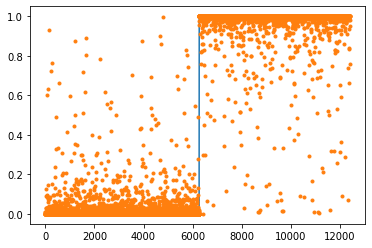

In [32]:
plt.plot(y)
plt.plot(a2(yhat.data),'.')

학습 후 상황

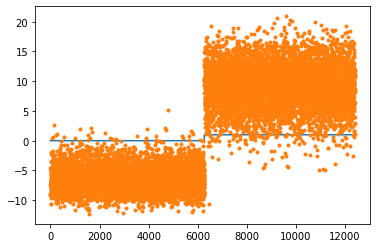

In [33]:
plt.plot(y)
plt.plot(yhat.data,'.')

In [34]:
ypred=a2(yhat.data)>0.5 

In [35]:
sum(ypred==y)/12396

tensor([0.9924])

### 2. 드랍이웃, 배치추가 (직접 네트워크 설계, pytorch+fastai) 

#### step1: dls를 만들자. 

In [36]:
ds=torch.utils.data.TensorDataset(X,y)

In [37]:
ds.tensors[0].shape

torch.Size([12396, 1, 28, 28])

-  torch.utils.data.random_split: Randomly split a dataset into non-overlapping new datasets of given lengths. Optionally fix the generator for reproducible results

In [38]:
ds1,ds2 = torch.utils.data.random_split(ds,[10000,2396]) 

미니배치 안하고

In [39]:
dl1 = torch.utils.data.DataLoader(ds1,batch_size=500) 
dl2 = torch.utils.data.DataLoader(ds2,batch_size=2396) 

In [40]:
dls=DataLoaders(dl1,dl2) 

#### step2: 아키텍처, 손실함수, 옵티마이저 

In [41]:
class Flatten(torch.nn.Module):
    def forward(self,x): 
        return x.reshape(x.shape[0],-1)

In [42]:
net=torch.nn.Sequential(
    torch.nn.Conv2d(1,16,5), 
    torch.nn.MaxPool2d(2), 
    torch.nn.ReLU(),
    torch.nn.Dropout2d(), 
    Flatten(),
    torch.nn.Linear(2304,1))

In [43]:
loss_fn=torch.nn.BCEWithLogitsLoss()
#optimizer= torch.optim.Adam(net.parameters())
# learner에서 option으로 넣어주기 때문에 빼기

$\uparrow$ 모형을 뜯어보는 방법에서 왜 만들어놓은 것 사용하면 안 되는지 설명

#### step3: lrnr 생성 후 적합

In [44]:
lrnr1 = Learner(dls,net,opt_func=Adam,loss_func=loss_fn) 

$\uparrow$ for문의 step 1,2,3,4 하는 과정

In [45]:
lrnr1.fit(10)

epoch,train_loss,valid_loss,time
0,0.461314,0.262909,00:00
1,0.288410,0.105316,00:00
2,0.197322,0.072749,00:00
3,0.144763,0.061698,00:00
4,0.112390,0.053427,00:00
5,0.090811,0.047791,00:00
6,0.076522,0.043751,00:00
7,0.065948,0.040841,00:00
8,0.058507,0.038681,00:00
9,0.053031,0.036384,00:00


$\uparrow$ GPU 를 사용하여 빨리 실행되는 모습

`-` 결과를 시각화하면 아래와 같다. 

$\downarrow$ 네트워크의 파라미터가 cuda,즉 GPU에 올라가있기 때문에 cuda에 올려줬다가 CPU로 찍어야 데이터가 그려지겠지!, sigmoid인 a2를 씌워준 결과

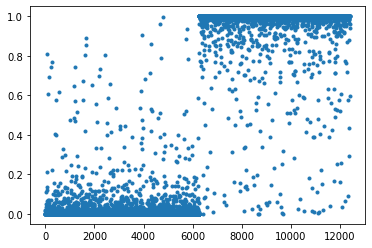

In [46]:
plt.plot(a2(net(X.to("cuda:0")).to("cpu").data),'.')

`-` 빠르고 적합결과도 좋음 

### 3. resnet34 (기존의 네트워크 사용, 순수 fastai)

요약:  세가지 방법을 사용해 옴.
1.  직접네트워크+순수pytorch
2. 드랍아웃, 배치추가: 직접 네트워크 설계, pytorch와 fastai leaner를 이용
3. 기존 네트워크 사용, 순수 fastai 로만 사용($\downarrow$ 내용)

`-` 데이터로부터 새로운 데이터로더스를 만들고 이를 dls2라고 하자.

In [47]:
path=untar_data(URLs.MNIST_SAMPLE) # dls 새로 만들기
path

Path('/home/csy/.fastai/data/mnist_sample')

In [48]:
path.ls() # 여기서 train 에 접근할 것

(#3) [Path('/home/csy/.fastai/data/mnist_sample/train'),Path('/home/csy/.fastai/data/mnist_sample/labels.csv'),Path('/home/csy/.fastai/data/mnist_sample/valid')]

In [49]:
dls2=ImageDataLoaders.from_folder(
    path,
    train='train',
    valid_pct=0.2)     # 2주차 이미지크롤링 참고

In [50]:
Learner?

Init signature:
Learner(
    dls,
    model,
    loss_func=None,
    opt_func=<function Adam at 0x7fd2fcc7aee0>,
    lr=0.001,
    splitter=<function trainable_params at 0x7fd319d77c10>,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
)
Docstring:      Group together a `model`, some `dls` and a `loss_func` to handle training
File:           ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/learner.py
Type:           type
Subclasses:     


In [51]:
cnn_learner?

Signature:
cnn_learner(
    dls,
    arch,
    normalize=True,
    n_out=None,
    pretrained=True,
    config=None,
    loss_func=None,
    opt_func=<function Adam at 0x7fd2fcc7aee0>,
    lr=0.001,
    splitter=None,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
    cut=None,
    n_in=3,
    init=<function kaiming_normal_ at 0x7fd3652ba0d0>,
    custom_head=None,
    concat_pool=True,
    lin_ftrs=None,
    ps=0.5,
    first_bn=True,
    bn_final=False,
    lin_first=False,
    y_range=None,
)
Docstring: Build a convnet style learner from `dls` and `arch`
File:      ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/vision/learner.py
Type:      function


`-` 러너오브젝트를 생성하고 학습하자. 

In [52]:
lrnr2=cnn_learner(dls2,resnet34,metrics=error_rate)
lrnr2.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.290342,0.126362,0.049896,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.054168,0.021316,0.005198,00:08


`-` 결과관찰

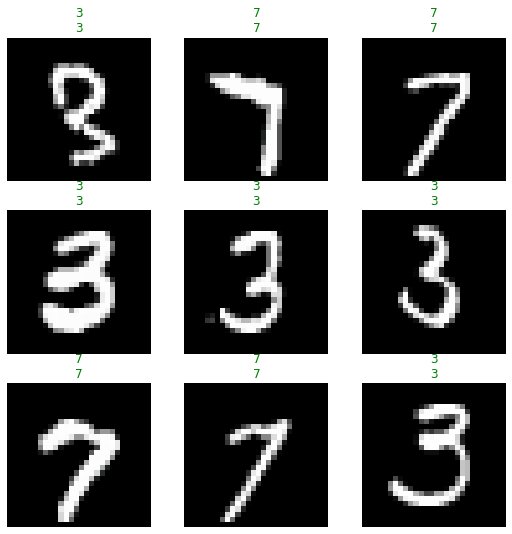

In [53]:
lrnr2.show_results()

### 모형을 뜯어보는 방법 (lrnr1.model)

`-` 우선 드랍아웃, 배치추가: 직접 네트워크 설계, pytorch와 fastai leaner를 이용한 방법2로 돌아가자.

In [54]:
net(X.to("cuda:0")) # 적합 결과를 볼 수 있음

tensor([[-9.7907],
        [-4.3854],
        [-9.2042],
        ...,
        [ 9.5100],
        [ 0.3990],
        [ 2.7595]], device='cuda:0', grad_fn=<AddmmBackward0>)

`-` 네트워크 구조

In [55]:
net

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): Flatten()
  (5): Linear(in_features=2304, out_features=1, bias=True)
)

In [56]:
net[0] # 이런식으로 층별 접근 가능

Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))

`-` 층별변환과정

In [57]:
print(X.shape, '--> input image')
print(net[0](X.to("cuda:0")).shape, '--> 2dConv')
print(net[1](net[0](X.to("cuda:0"))).shape, '--> MaxPool2d')
print(net[2](net[1](net[0](X.to("cuda:0")))).shape, '--> ReLU')
print(net[3](net[2](net[1](net[0](X.to("cuda:0"))))).shape, '--> Dropout2d')
print(net[4](net[3](net[2](net[1](net[0](X.to("cuda:0")))))).shape, '--> Flatten')
print(net[5](net[4](net[3](net[2](net[1](net[0](X.to("cuda:0"))))))).shape, '--> Linear')

torch.Size([12396, 1, 28, 28]) --> input image
torch.Size([12396, 16, 24, 24]) --> 2dConv
torch.Size([12396, 16, 12, 12]) --> MaxPool2d
torch.Size([12396, 16, 12, 12]) --> ReLU
torch.Size([12396, 16, 12, 12]) --> Dropout2d
torch.Size([12396, 2304]) --> Flatten
torch.Size([12396, 1]) --> Linear


피드 forward 과정...뭐....

`-` 최종결과

In [58]:
net[5](net[4](net[3](net[2](net[1](net[0](X.to("cuda:0")))))))

tensor([[-9.7907],
        [-4.3854],
        [-9.2042],
        ...,
        [ 9.5100],
        [ 0.3990],
        [ 2.7595]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [59]:
net(X.to("cuda:0"))

tensor([[-9.7907],
        [-4.3854],
        [-9.2042],
        ...,
        [ 9.5100],
        [ 0.3990],
        [ 2.7595]], device='cuda:0', grad_fn=<AddmmBackward0>)

두 결과가 일치하는 모습

`-` lrnr1자체를 활용해도 층별변환과정을 추적할수 있음. (lrnr1.model = net 임을 이용) 

지금까지는 lrnr1를 이용해서 for문 돌림으로써 원하는 층별 세부과정을 관찰했지만, lrnr1자체에서도 모형을 확인할 수 있음

In [60]:
lrnr1.model

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): Flatten()
  (5): Linear(in_features=2304, out_features=1, bias=True)
)

In [61]:
lrnr1.model[0]

Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))

In [62]:
lrnr1.model(X.to("cuda:0"))

tensor([[-9.7907],
        [-4.3854],
        [-9.2042],
        ...,
        [ 9.5100],
        [ 0.3990],
        [ 2.7595]], device='cuda:0', grad_fn=<AddmmBackward0>)

$\uparrow$ 2d colv이 진행되는 과정

In [63]:
print(X.shape, '--> input image')
print(lrnr1.model[0](X.to("cuda:0")).shape, '--> 2dConv')
print(lrnr1.model[1](lrnr1.model[0](X.to("cuda:0"))).shape, '--> MaxPool2d')
print(lrnr1.model[2](lrnr1.model[1](lrnr1.model[0](X.to("cuda:0")))).shape, '--> ReLU')
print(lrnr1.model[3](lrnr1.model[2](lrnr1.model[1](lrnr1.model[0](X.to("cuda:0"))))).shape, '--> Dropout2d')
print(lrnr1.model[4](lrnr1.model[3](lrnr1.model[2](lrnr1.model[1](lrnr1.model[0](X.to("cuda:0")))))).shape, '--> Flatten')
print(lrnr1.model[5](lrnr1.model[4](lrnr1.model[3](lrnr1.model[2](lrnr1.model[1](lrnr1.model[0](X.to("cuda:0"))))))).shape, '--> Linear')

torch.Size([12396, 1, 28, 28]) --> input image
torch.Size([12396, 16, 24, 24]) --> 2dConv
torch.Size([12396, 16, 12, 12]) --> MaxPool2d
torch.Size([12396, 16, 12, 12]) --> ReLU
torch.Size([12396, 16, 12, 12]) --> Dropout2d
torch.Size([12396, 2304]) --> Flatten
torch.Size([12396, 1]) --> Linear


`-` 정리: 모형은 항상 아래와 같이 2d-part 와 1d-part로 나누어진다. 
```
torch.Size([12396, 1, 28, 28]) --> input image
torch.Size([12396, 16, 24, 24]) --> 2dConv
torch.Size([12396, 16, 12, 12]) --> MaxPool2d
torch.Size([12396, 16, 12, 12]) --> ReLU
torch.Size([12396, 16, 12, 12]) --> Dropout2d
===============================================================
torch.Size([12396, 2304]) --> Flatten
torch.Size([12396, 1]) --> Linear
```

엄밀히 말하면  Flatten은 2d를 1d로 바꿔주는 과정이긴 해..

엄밀히 말하면 공식적인 분류는 아닌 1d-part 2d-part

`-` 2d-part: 
- 2d선형변환: torch.nn.Conv2d()
- 2d비선형변환: torch.nn.MaxPool2d(), torch.nn.ReLU()

`-` 1d-part:
- 1d선형변환: torch.nn.Linear() 
- 1d비선형변환: torch.nn.ReLU()

In [64]:
_net1=torch.nn.Sequential(
    net[0],
    net[1],
    net[2],
    net[3])
_net2=torch.nn.Sequential(
    net[4],
    net[5])

1d-part랑 2d-part 몰아서 아키텍쳐 설계 $\to$ 이렇게 층별로 몰아서 관리하기도 함

In [65]:
_net1

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
)

In [66]:
_net2

Sequential(
  (0): Flatten()
  (1): Linear(in_features=2304, out_features=1, bias=True)
)

In [67]:
_net=torch.nn.Sequential(_net1,_net2)

In [68]:
_net[1](_net[0](X.to('cuda:0')))

tensor([[-9.7907],
        [-4.3854],
        [-9.2042],
        ...,
        [ 9.5100],
        [ 0.3990],
        [ 2.7595]], device='cuda:0', grad_fn=<AddmmBackward0>)

### lrnr2.model 분석 

`-` 아래의 모형은 현재 가장 성능이 좋은 모형(**state of the art**)중 하나인 resnet이다. 

In [69]:
lrnr2.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

`-` 특징 
- lrnr2.model[0] _ 2d-part: 입력채널이 3이다, Conv2d에 padding/stride의 옵션이 있다, 드랍아웃이 없다, 배치정규화BatchNorm2d가 있다. 
- lrnr2.model[1] _ 1d-part: 배치정규화BatchNorm1d가 있다, 출력의 차원이 2이다.

우리가 네트워크 만들때 입력 채널은 1이기 때문에 resnet 기본 입력채널 3과 다르다. 그래서 Data Load Set 만들때도 network만들때도 이에 맞는 dls 따로 만들어줘야 한다. 왜 3일까.. 컬러이미지를 기본으로 생각하고 있는 resnet34.. padding은 shape 변하지 않음..

***DLS, Networks***
- 네트워크의 형태에 따라서 dls의 형태도 다르게 만들어야 한다. 
- MLP모형: 입력이 $784$, 첫 네트워크의 형태가 $784 \to 30$ 인 torch.nn.Linear()
- CNN모형: 입력이 $1\times 28 \times 28$, 첫 네트워크의 형태가 $1\times 28 \times 28 \to 16 \times 24 \times 24$ 인 torch.nn.Conv2d()
- Resnet34: 입력이 $3\times 28 \times 28$, 첫 네트워크의 형태가 $3\times 28 \times 28 \to ??$ 

Multi Linear Perceptron(= Deep Neural Network)

***참고***

|$y$|분포가정|마지막층의 활성화함수|손실함수(파이토치)|
|:--:|:--:|:--:|:--:|
|3.45, 4.43, ... (연속형) |정규분포|Linear|MSEloss|
|0 or 1|이항분포(베르누이)|Sigmoid| BCEloss|
|[0,0,1], [0,1,0], [1,0,0]| 다항분포|Softmax| CrossEntropyLoss|

### 딥러닝 연구의 네가지 축 

(1) 아키텍처 $(\star)$
- 한 영역의 전문적인 지식이 필요한 것이 아닌것 같다. 
- 끈기, 약간의 운, 직관, 좋은컴퓨터.. 
    - yhat <- X,net

(2) 손실함수 
- 통계적지식필요 // 기존의 손실함수를 변형하는 형태 (패널티텀활용)
    - 수렴하는 해가 달라지기 때문
    - loss <- (y,yhat)

(3) 미분계산 (컴공)
- 병렬처리등에 대한 지식 필요 
    - (d/dw)loss <- loss

(4) 옵티마이저 (산공)
- 최적화에 대한 이론적 토대 필요 


`-` 딥러닝 이전까지의 아키텍처에 대한 연구 
- 파라메트릭 모형: 전문가 (실제 전문가가 해석한 거 바탕으로)
- 넌파라메트릭 모형: 전문가(보통 통계 전문가)
- 딥러닝: 상대적으로 비전문가(지금 우리가 할 수 있는 수준...)

`-` 특징: 비전문가도 만들수 있다 + 블랙박스 (내부연산을 뜯어볼 수는 있지만 우리가 해석하기 어려움) 
- 신뢰받기 어려워

`-` 설명가능한 딥러닝에 대한 요구 (XAI)

### 설명가능한 CNN모형

`-` 현재까지의 모형 
- 1단계: 2d선형변환 $\to$ 2d비선형변환 
- 2단계: Flatten $\to$ MLP

`-` lrnr1(교수님꼐서 만들었던 모형)의 모형을 다시 복습

In [70]:
lrnr1.model

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): Flatten()
  (5): Linear(in_features=2304, out_features=1, bias=True)
)

In [71]:
net1=torch.nn.Sequential(
    lrnr1.model[0],
    lrnr1.model[1],
    lrnr1.model[2],
    lrnr1.model[3])

net1, lnnr1에서 구성했던 파라미터들 가져오기

In [72]:
net1(X.to('cuda:0')).shape

torch.Size([12396, 16, 12, 12])

observation * 16channel * 12 * 12

`-` 1단계까지의 출력결과를 시각화 

In [73]:
fig, axs = plt.subplots(8,8) 
k=0
for i in range(8)
    for j in range(8):
        axs[i,j].imshow(net1(X.to("cuda:0"))[0][k].to("cpu").data) # 첫번쨰 저[0]obseervation으로 고정
        k=k+1
fig.set_figheight(8)
fig.set_figwidth(8)
fig.tight_layout()

SyntaxError: invalid syntax (<ipython-input-73-aa8cd60bd18b>, line 3)

#### net1은 유지+ net2의 구조를 변경!!

왜? 설명은 아래에서

In [74]:
lrnr1.model

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Dropout2d(p=0.5, inplace=False)
  (4): Flatten()
  (5): Linear(in_features=2304, out_features=1, bias=True)
)

`-` 계획 
- 변경전net2: $(n,16,12,12) \overset{flatten}{\Longrightarrow} (n,?) \overset{Linear(?,1)}{\Longrightarrow} (n,1)$
- 변경후net2: $(n,16,12,12) \overset{gap+flatten}{\Longrightarrow} (n,16) \overset{Linear(16,1)}{\Longrightarrow} (n,1)$

gap(global activate pooling) -  16개의 이미지가 $12\times12$픽셀로 정리되어 있는데 여기서 평균으로 값을 하나씩만 뽑고 싶다.

flatten - 추가해서 dimention 줄여주기

`-` gap: 12$\times$12 픽셀을 평균내서 하나의 값으로 대표하자 (왜?)

In [75]:
ap=torch.nn.AdaptiveAvgPool2d(output_size=1)

In [76]:
ap(net1(X.to("cuda:0"))).shape

torch.Size([12396, 16, 1, 1])

이미지 하나당 하나의 평균아 나타나 16개가 찍힌 모습

--

***보충학습:ap(average pooling)는 그냥 평균***

In [77]:
torch.tensor([[0.1,0.2],[0.3,0.4]])

tensor([[0.1000, 0.2000],
        [0.3000, 0.4000]])

In [78]:
ap(torch.tensor([[0.1,0.2],[0.3,0.4]]))

tensor([[0.2500]])

--

`-` flatten 

In [79]:
flatten(ap(net1(X.to("cuda:0")))).shape

torch.Size([12396, 16])

`-` linear 

In [80]:
_l1=torch.nn.Linear(16,1,bias=False) 

In [81]:
_l1.to("cuda:0")

Linear(in_features=16, out_features=1, bias=False)

In [82]:
_l1(flatten(ap(net1(X.to("cuda:0"))))).shape

torch.Size([12396, 1])

`-` 이걸 net2로 구성하자. $\to$ (net1,net2)를 묶어서 하나의 새로운 네트워크를 만들자. 

In [83]:
net2=torch.nn.Sequential(
    torch.nn.AdaptiveAvgPool2d(1),
    Flatten(),
    torch.nn.Linear(16,1,bias=False))

In [84]:
net=torch.nn.Sequential(net1,net2) 
net

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Dropout2d(p=0.5, inplace=False)
  )
  (1): Sequential(
    (0): AdaptiveAvgPool2d(output_size=1)
    (1): Flatten()
    (2): Linear(in_features=16, out_features=1, bias=False)
  )
)

새로 데이터를 만들어서 위에서 두 번째 sequantial이 학습이 안 되어 있을걸?

`-` 수정된 네트워크로 lrnr3을 만들고 재학습

In [85]:
ds=torch.utils.data.TensorDataset(X,y)
ds1,ds2=torch.utils.data.random_split(ds,[10000,2396])
dl1=torch.utils.data.DataLoader(ds1,batch_size=1000)
dl2=torch.utils.data.DataLoader(ds2,batch_size=2396)
dls=DataLoaders(dl1,dl2)

In [86]:
lrnr3=Learner(dls,net,opt_func=Adam,loss_func=loss_fn,lr=0.1)

In [87]:
lrnr3.fit(10)

epoch,train_loss,valid_loss,time
0,0.705497,0.690434,00:00
1,0.696695,0.685358,00:00
2,0.685859,0.620693,00:00
3,0.671974,0.585729,00:00
4,0.660507,0.576176,00:00
5,0.652785,0.564210,00:00
6,0.647075,0.573031,00:00
7,0.641958,0.559054,00:00
8,0.637493,0.561377,00:00
9,0.634957,0.554920,00:00


### CAM: observation을 1개로 고정하고 net2에서 layer의 순서를 바꿔서 시각화

Class Activation Map

http://cnnlocalization.csail.mit.edu/Zhou_Learning_Deep_Features_CVPR_2016_paper.pdf

원 논문

`-` 계획 
- 변경전net2: $(n,16,12,12) \overset{flatten}{\Longrightarrow} (n,?) \overset{Linear(?,1)}{\Longrightarrow} (n,1)$
- 변경후net2: $(n,16,12,12) \overset{gap+flatten}{\Longrightarrow} (n,16) \overset{Linear(16,1)}{\Longrightarrow} (n,1)$
- CAM: $(1,16,12,12) \overset{Linear(16,1)+flatten}{\Longrightarrow} (12,12) \overset{gap}{\Longrightarrow} 1$

cam에서 observation 을 1로 고정, linear도 16$\times$1 vector니까 곱해질 수 있겠지 flatten 후 gap하면 fix한 observation으로 dimention이 변경

`-` 준비과정1: 시각화할 샘플을 하나 준비하자. 

In [88]:
x=X[100] # 이미지 임의로 하나 선택
X.shape,x.shape

(torch.Size([12396, 1, 28, 28]), torch.Size([1, 28, 28]))

- 차원이 다르므로 나중에 네트워크에 넣을때 문제가 생길 수 있음 $\to$ 차원을 맞춰주자

In [89]:
x=x.reshape(1,1,28,28) 

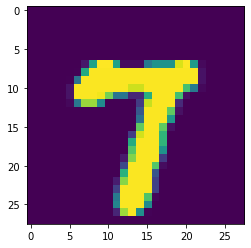

In [90]:
plt.imshow(x.squeeze())

squeeze 로 차원을 28$\times$28로 변환

x자체는 2d라 그려지지 않지

fastai로 훈련해서 gpu에 있는 네트워크를 cpu로!

`-` 준비과정2: 계산과 시각화를 위해서 각 네트워크를 cpu로 옮기자. (fastai로 학습한 직후라 GPU에 있음)

In [91]:
net1.to('cpu')
net2.to('cpu')

Sequential(
  (0): AdaptiveAvgPool2d(output_size=1)
  (1): Flatten()
  (2): Linear(in_features=16, out_features=1, bias=False)
)

`-` forward확인: 이 값을 기억하자. 

activation 취하기 전에는 음수/양수로 되어있고,

seventensor 가 three tensor보다 먼저 정의됨

따라서 음수이면 7, 양수이면 1이라고 cnn이 판단

In [92]:
net2(net1(x)) ## 음수이므로 class=7 이라고 CNN이 판단 

tensor([[-0.2944]], grad_fn=<MmBackward0>)

`-` net2를 수정하고 forward값 확인 

net1, net2 적용했을때 나오는 값을 확인한다는 뜻

In [93]:
net2

Sequential(
  (0): AdaptiveAvgPool2d(output_size=1)
  (1): Flatten()
  (2): Linear(in_features=16, out_features=1, bias=False)
)

- net2에서 Linear와 AdaptiveAvgPool2d의 적용순서를 바꿔줌

차원확인

In [94]:
net1(x).squeeze().shape

torch.Size([16, 12, 12])

In [95]:
net2[2].weight.squeeze().shape

torch.Size([16])

불필요한 값들 안 나오게 차원 조절해주기

**Linear(in_features=16, out_features=1, bias=False)** 를 적용: 16 $\times$ (16,12,12) $\to$ (12,12) 

In [96]:
net2[2].weight.squeeze() @ net1(x).squeeze()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (192x12 and 16x1)

- 실패.. 

matrix 계산할때 사용할 수 있고, matrix보다 한 차원 높은 tensor라 적용을 할 수 없다.

In [97]:
camimg=torch.einsum('i,ijk -> jk',net2[2].weight.squeeze(), net1(x).squeeze()) 
camimg.shape

torch.Size([12, 12])

- 성공 

einsum 에 변하고 싶은 차원, 벡터,벡터 입력

**AdaptiveAvgPool2d(output_size=1)** 를 적용

In [98]:
ap(camimg)

tensor([[-0.2944]], grad_fn=<MeanBackward1>)

`!!!!` 똑같다?

`-` 아래의 값이 같다. 

In [99]:
net2(net1(x)),ap(camimg)

(tensor([[-0.2944]], grad_fn=<MmBackward0>),
 tensor([[-0.2944]], grad_fn=<MeanBackward1>))

`-` 왜냐하면 ap와 선형변환 모두 linear이므로 순서를 바꿔도 상관없음 

`-` 아래와 결국 같은 이치

In [100]:
_x= np.array([1,2,3,4])
_x

array([1, 2, 3, 4])

In [101]:
np.mean(_x*2+1)

6.0

In [102]:
2*np.mean(_x)+1

6.0

`-` 이제 camimg 에 관심을 가져보자. 

In [103]:
camimg

tensor([[-0.9576, -0.9576, -0.9576, -0.9576, -0.9576, -0.9576, -0.9576, -0.9576,
         -0.9576, -0.9576, -0.9576, -0.9576],
        [-0.9576, -0.9576, -0.9576, -0.9576, -0.9576, -0.9576, -0.9576, -0.9576,
         -0.9576, -0.9576, -0.9576, -0.9576],
        [-0.9576, -0.9472,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000, -0.9576],
        [-0.9576,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000, -0.9576],
        [-0.9576,  1.3025,  0.0000,  0.0000,  3.6977,  4.4997,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000, -0.9576],
        [-0.9576,  6.7748,  8.9133,  3.6115,  3.7973,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000, -0.9576, -0.9576],
        [-0.9576, -0.9576,  1.3213, -0.9576, -0.9576,  0.0000,  0.0000,  0.0000,
          0.0000, -0.8683, -0.9576, -0.9576],
        [-0.9576, -0.9576, -0.9576, -0.9576, -0.9576,  0.0000,  0.0000,  0.0000,
          0.0000, -0.9576, -0.

In [104]:
ap(camimg), torch.mean(camimg)

(tensor([[-0.2944]], grad_fn=<MeanBackward1>),
 tensor(-0.2944, grad_fn=<MeanBackward0>))

- 이미지의 값은 대부분 0이지만 궁극적으로는 평균을 내서 음수의 값이 나와야 한다. 

`-` 결국 특정픽셀에서 큰 음의 값이 나오기 떄문에 궁극적으로는 평균이 음수가 된다. 

- 평균이 음수이다. $\leftrightarrow$ 이미지가 의미하는것이 7이다. 
- 특정픽셀이 큰 음수값을 가진다. $\leftrightarrow$ 그 픽셀에서 이미지가 7임을 뚜렷하게 알 수 있다. 

`-` 그 특정픽셀이 어딘가? 

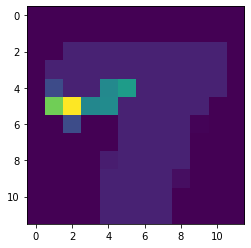

In [105]:
plt.imshow(camimg.data)

- 초록색으로 표현된 부분은 CNN모형이 이 숫자를 7이라고 생각한 근거가 된다. 

`-` 원래의 이미지와 비교

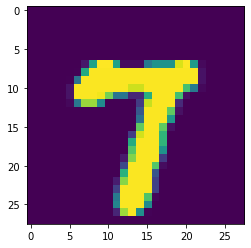

In [106]:
plt.imshow(x.squeeze()) 

`-` 두 이미지를 겹쳐서 그리면 멋진 그림이 될 것 같다. 

step1: 원래이미지를 흑백으로 그리자. 

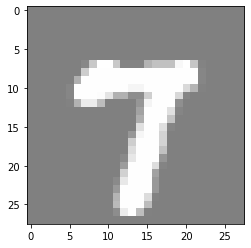

In [107]:
plt.imshow(x.squeeze(),cmap='gray',alpha=0.5)

`-` step2: 원래이미지는 (28,28)인데 camimg는 (12,12)픽셀 $\to$ camimg의 픽셀을 늘리자. 

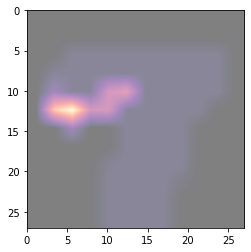

In [108]:
plt.imshow(camimg.data,alpha=0.5, extent=(0,27,27,0),interpolation='bilinear',cmap='magma')

fixel 사이의 값을 smoothing하기 위해 interpolation에 bilinear 옵션 취하기

fastai 교재에 많이 사용되는 cmap의 magma 옵션 사용

`-` step3: 합치자.

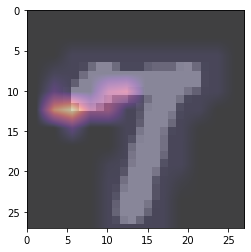

In [109]:
plt.imshow(x.squeeze(),cmap='gray',alpha=0.5)
plt.imshow(camimg.data,alpha=0.5, extent=(0,27,27,0),interpolation='bilinear',cmap='magma')

### 숙제 

`-` 숫자3이 그려진 이미지를 observation으로 선택하고 위와 같이 cam을 이용하여 시각화하라. 

`-` 준비과정1: 시각화할 샘플을 하나 준비하자. 

In [146]:
_x=X[-100].reshape(1,1,28,28)

In [147]:
_camimg=torch.einsum('i,ijk -> jk',net2[2].weight.squeeze(), net1(_x).squeeze()) 

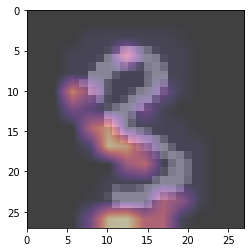

In [148]:
plt.imshow(_x.squeeze(),cmap='gray',alpha=0.5)
plt.imshow(_camimg.data,alpha=0.5, extent=(0,27,27,0),interpolation='bilinear',cmap='magma')